Спесивцева Полина Эдуардовна, БПМ223

вариант 8

**Задача**


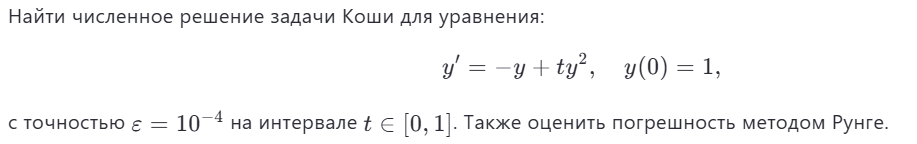

**Метод решения**

Используем метод Рунге-Кутты 4-го порядка для численного решения дифф.ур. Для оценки погрешности применим метод Рунге(основан на сравнении решений с разными шагами интегрирования).

**Описание метода Рунге-Кутты 4-го порядка**

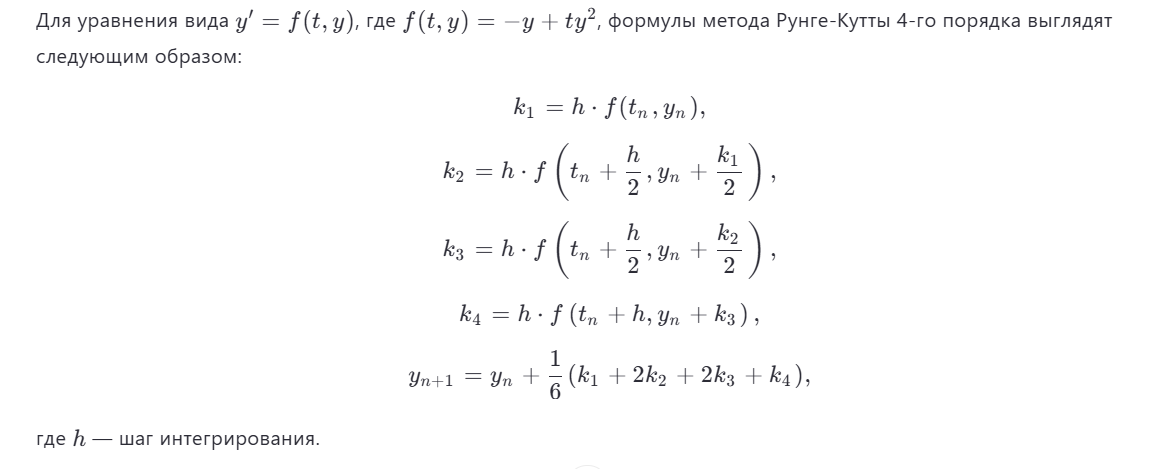

**Метод Рунге для оценки погрешности**

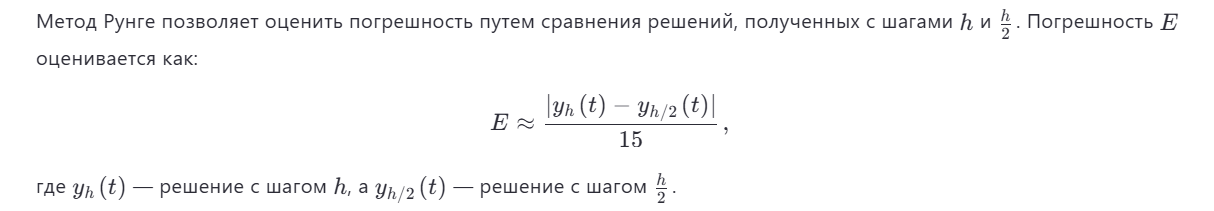

**Реализация на Python**

In [ ]:
import numpy as np

# Функция правой части дифференциального уравнения
def f(t, y):
    return -y + t * y**2

# Метод Рунге-Кутты 4-го порядка
def runge_kutta_4(f, t0, y0, T, h):
    t = t0
    y = y0
    result = [(t, y)]

    while t < T:
        k1 = h * f(t, y)
        k2 = h * f(t + h / 2, y + k1 / 2)
        k3 = h * f(t + h / 2, y + k2 / 2)
        k4 = h * f(t + h, y + k3)

        y += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        t += h

        # Добавляем результат в список
        result.append((t, y))

    return np.array(result)

# Оценка погрешности методом Рунге
def estimate_error(rk4_solution_h, rk4_solution_h2, t_target):
    # Ищем значения y(t_target) для обоих решений
    y_h = None
    y_h2 = None

    for t, y in rk4_solution_h:
        if np.isclose(t, t_target):
            y_h = y
            break

    for t, y in rk4_solution_h2:
        if np.isclose(t, t_target):
            y_h2 = y
            break

    if y_h is None or y_h2 is None:
        raise ValueError("Не удалось найти значение y(t_target) в одном из решений")

    # Оценка погрешности
    error_estimate = abs(y_h - y_h2) / 15
    return error_estimate

# Параметры задачи
t0 = 0
y0 = 1
T = 1
epsilon = 1e-4

# Начальный шаг
h = 0.1

# Первое решение с шагом h
rk4_solution_h = runge_kutta_4(f, t0, y0, T, h)

# Второе решение с шагом h/2
rk4_solution_h2 = runge_kutta_4(f, t0, y0, T, h / 2)

# Оценка погрешности в точке T
error_estimate = estimate_error(rk4_solution_h, rk4_solution_h2, T)

# Вывод результатов
print("Решение с шагом h:")
for t, y in rk4_solution_h:
    print(f"t = {t:.4f}, y = {y:.8f}")

print("\nРешение с шагом h/2:")
for t, y in rk4_solution_h2:
    print(f"t = {t:.4f}, y = {y:.8f}")

print(f"\nОцененная погрешность в точке t = {T}: {error_estimate:.8f}")

Решение с шагом h:
t = 0.0000, y = 1.00000000
t = 0.1000, y = 0.90909091
t = 0.2000, y = 0.83333334
t = 0.3000, y = 0.76923080
t = 0.4000, y = 0.71428576
t = 0.5000, y = 0.66666673
t = 0.6000, y = 0.62500008
t = 0.7000, y = 0.58823538
t = 0.8000, y = 0.55555565
t = 0.9000, y = 0.52631590
t = 1.0000, y = 0.50000011
t = 1.1000, y = 0.47619060

Решение с шагом h/2:
t = 0.0000, y = 1.00000000
t = 0.0500, y = 0.95238095
t = 0.1000, y = 0.90909091
t = 0.1500, y = 0.86956522
t = 0.2000, y = 0.83333333
t = 0.2500, y = 0.80000000
t = 0.3000, y = 0.76923077
t = 0.3500, y = 0.74074074
t = 0.4000, y = 0.71428572
t = 0.4500, y = 0.68965518
t = 0.5000, y = 0.66666667
t = 0.5500, y = 0.64516129
t = 0.6000, y = 0.62500001
t = 0.6500, y = 0.60606061
t = 0.7000, y = 0.58823530
t = 0.7500, y = 0.57142858
t = 0.8000, y = 0.55555556
t = 0.8500, y = 0.54054055
t = 0.9000, y = 0.52631580
t = 0.9500, y = 0.51282052
t = 1.0000, y = 0.50000001

Оцененная погрешность в точке t = 1: 0.00000001


Таким образом численное решение задачи в точке t=1:

y(1)≈0.5000 (с точностью до 10^(−4))

Погрешность в точке t = 1: 0.00000001 , это меньше 10^(-4), поэтому удовлетворяет условию задачи